# Лабораторная работа №3
## Распознавание изображений на примере рукописных цифр

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from matplotlib import pyplot as plt
%matplotlib inline

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

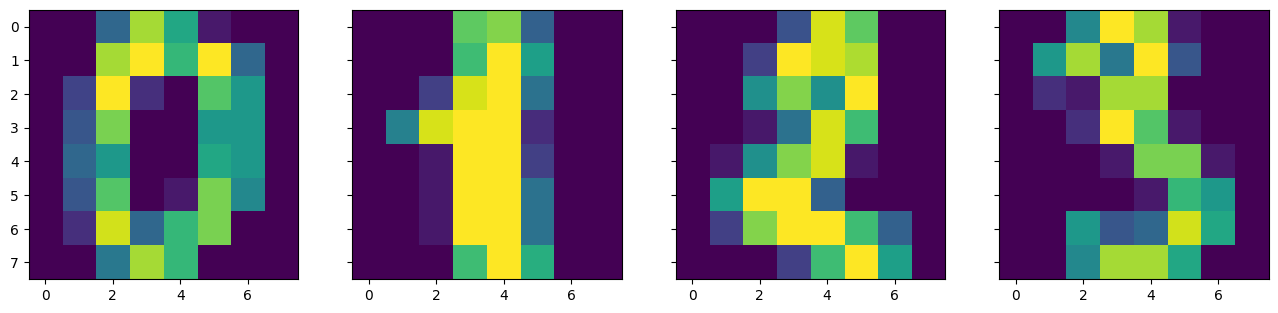

In [ ]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,4))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]));

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Используйте k=10, чтобы полученные оценки качества имели небольшой разброс. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Получите среднее значение (которое и будет оценкой качества работы) массива, который возвращает cross_val_score.

In [ ]:
import numpy as np

In [ ]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

model1 = DecisionTreeClassifier()
quality1: np.ndarray = cross_val_score(model1, X_train, y_train, cv=10)
print("Оценки качества:")
print(*quality1, sep=',\n')

quality_avg1 = quality1.mean()
print("Среднее качество/точность: " + quality_avg1.__str__())
print("Средняя ошибка: " + (1.00 - quality_avg1).__str__())

Оценки качества:
0.8174603174603174,
0.8412698412698413,
0.8492063492063492,
0.8253968253968254,
0.8253968253968254,
0.8571428571428571,
0.8492063492063492,
0.864,
0.872,
0.832
Среднее качество/точность: 0.8433079365079366
Средняя ошибка: 0.15669206349206344


Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Обучайтесь только на train выборке. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. Качество классификации новой модели - среднее значение cross_val_score. Сравните работу композиции деревьев с одним решающем деревом.

In [ ]:
model2 = BaggingClassifier(
    model1,
    n_estimators=100
    )

quality2 = cross_val_score(model2, X_train, y_train, cv=10)
print("Оценки качества:")
print(*quality2, sep=',\n')

quality_avg2 = quality2.mean()
print("Среднее качество/точность: " + quality_avg2.__str__())
print("Средняя ошибка: " + (1.00 - quality_avg2).__str__())

Оценки качества:
0.9444444444444444,
0.9365079365079365,
0.9285714285714286,
0.9365079365079365,
0.8968253968253969,
0.9365079365079365,
0.9444444444444444,
0.952,
0.96,
0.968
Среднее качество/точность: 0.9403809523809524
Средняя ошибка: 0.05961904761904757


Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Каково качество работы алгоритма?

In [ ]:
# doesn't work
# model3 = BaggingClassifier(model1, n_estimators=100, max_features="sqrt")

model3 = BaggingClassifier(
    model1,
    n_estimators=100,
    max_features=round(np.sqrt(X_train.shape[1]))
    )

quality3 = cross_val_score(model3, X_train, y_train, cv=10)
print("Оценки качества:")
print(*quality3, sep=',\n')

quality_avg3 = quality3.mean()
print("Среднее качество/точность: " + quality_avg3.__str__())
print("Средняя ошибка: " + (1.00 - quality_avg3).__str__())

Оценки качества:
0.9365079365079365,
0.9682539682539683,
0.9603174603174603,
1.0,
0.9206349206349206,
0.9603174603174603,
0.9603174603174603,
0.952,
0.944,
0.976
Среднее качество/точность: 0.9578349206349206
Средняя ошибка: 0.042165079365079405


Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn. Попробуйте выбирать опять же $\sqrt{d}$ признаков. Какое теперь качество полученного классификатора?

In [ ]:
model4 = DecisionTreeClassifier(max_features='sqrt')


model5 = BaggingClassifier(
    model4,
    n_estimators=100
    )

quality5 = cross_val_score(model5, X_train, y_train, cv=10)
print("Оценки качества:")
print(*quality5, sep=',\n')

quality_avg5 = quality5.mean()
print("Среднее качество/точность: " + quality_avg5.__str__())
print("Средняя ошибка: " + (1.00 - quality_avg5).__str__())

Оценки качества:
0.9603174603174603,
0.9920634920634921,
0.9523809523809523,
0.9841269841269841,
0.9682539682539683,
0.9841269841269841,
0.9920634920634921,
0.984,
0.976,
0.992
Среднее качество/точность: 0.9785333333333334
Средняя ошибка: 0.021466666666666634


Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest. Сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble.

In [ ]:
model6 = RandomForestClassifier(n_estimators=100, max_features='sqrt')
quality6 = cross_val_score(model5, X_train, y_train, cv=10)
print("Оценки качества:")
print(*quality6, sep=',\n')

quality_avg6 = quality6.mean()
print("Среднее качество/точность: " + quality_avg6.__str__())
print("Средняя ошибка: " + (1.00 - quality_avg6).__str__())

Оценки качества:
0.9523809523809523,
0.9841269841269841,
0.9682539682539683,
0.9841269841269841,
0.9682539682539683,
0.9920634920634921,
0.9841269841269841,
0.976,
0.984,
0.992
Среднее качество/точность: 0.9785333333333334
Средняя ошибка: 0.021466666666666634


Out-of-bag error

Забегая вперед, отметим, что при использовании случайных лесов нет необходимости в кросс-валидации или в отдельном тестовом наборе, чтобы получить несмещенную оценку ошибки набора тестов.


P. S. https://habr.com/ru/companies/ods/articles/324402/

Тогда получается смысла смотреть нет?


Изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров на обучающей и тестовой выборке

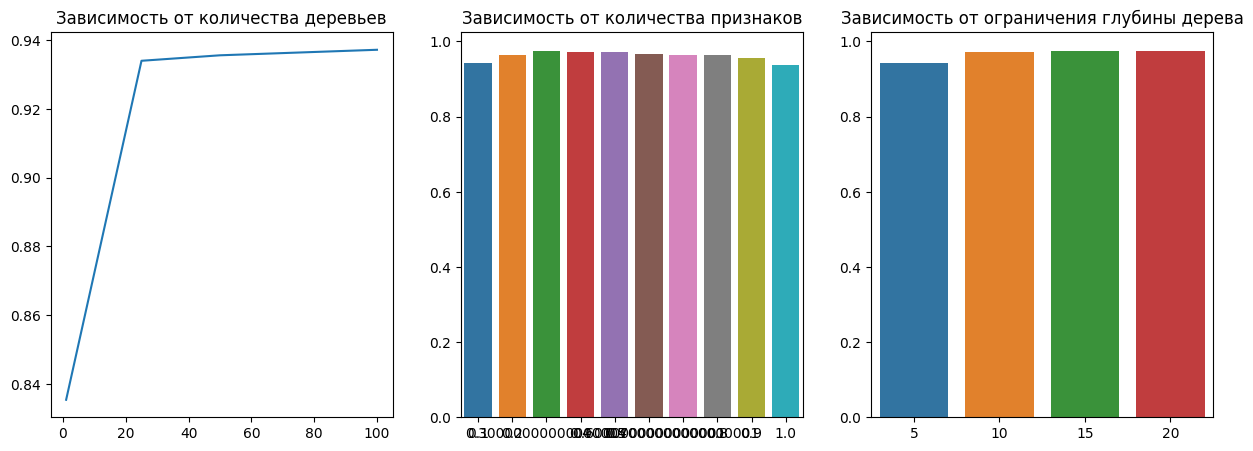

In [ ]:
# кол-во деревьев от 1 до 100
tree_counts = [1, 25, 50, 100]
# кол-во признаков от 0.1 доли до 1 (т. е. от 10 до 100%)
feature_counts =  [ i * 0.1 for i in range(1, 11) ]
# макс глубина от 5 до неограниченного
max_depths = [5, 10, 15, 20, None]

results_tree_count = []
results_feature_count = []
results_max_depth = []

import matplotlib.pyplot as plt
import seaborn as sns

# Исследование влияния количества деревьев
for tree_count in tree_counts:
    model = BaggingClassifier(n_estimators=tree_count, random_state=17)
    quality = cross_val_score(model, X_train, y_train, cv=10).mean()
    results_tree_count.append(quality)

# Исследование влияния количества признаков
for feature_count in feature_counts:
    model = BaggingClassifier(n_estimators=100, max_features=feature_count, random_state=17)
    quality = cross_val_score(model, X_train, y_train, cv=10).mean()
    results_feature_count.append(quality)

# Исследование влияния ограничения на глубину дерева
for max_depth in max_depths:
    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=17)
    quality = cross_val_score(model, X_train, y_train, cv=10).mean()
    results_max_depth.append(quality)

# Построение графиков
plt.figure(figsize=(15, 5))

# График зависимости от количества деревьев
plt.subplot(1, 3, 1)
sns.lineplot(x=tree_counts, y=results_tree_count)
plt.title('Зависимость от количества деревьев')

# График зависимости от количества признаков
plt.subplot(1, 3, 2)
sns.barplot(x=feature_counts, y=results_feature_count)
plt.title('Зависимость от количества признаков')

# График зависимости от ограничения глубины дерева
plt.subplot(1, 3, 3)
sns.barplot(x=max_depths, y=results_max_depth)
plt.title('Зависимость от ограничения глубины дерева')

plt.show()